# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Reza Firmansyah Putranto
- **Email:** rezafp30@gmail.com
- **ID Dicoding:** reza_fp

## Menentukan Pertanyaan Bisnis

- Bagaimana demografi pelanggan memengaruhi frekuensi dan nilai pesanan?
- Bagaimana waktu pengiriman pesanan memengaruhi kepuasan pelanggan dan potensi repeat order?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from lifelines import KaplanMeierFitter

## Data Wrangling

### Gathering Data

In [4]:
customers_df = pd.read_csv('https://drive.google.com/uc?id=1-jT2LdZ3I-ZtCiEPDwcRgi0U6RMtDkjT')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
orders_df = pd.read_csv('https://drive.google.com/uc?id=1p9vo9lFJNRVHnHXa93AAgH9g4sE4Jxxe')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
geolocation_df = pd.read_csv('https://drive.google.com/uc?id=1LTZbLJCG0tyJnp0KWrBFPoQfcKQWmC1p')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Assessing Data

#### Menilai tabel `customers_df`

In [7]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [8]:
customers_df.nunique()

,0
customer_id,99441
customer_unique_id,96096
customer_zip_code_prefix,14994
customer_city,4119
customer_state,27


In [9]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [10]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai tabel `orders_df`

In [11]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
orders_df.nunique()

,0
order_id,99441
customer_id,99441
order_status,8
order_purchase_timestamp,98875
order_approved_at,90733
order_delivered_carrier_date,81018
order_delivered_customer_date,95664
order_estimated_delivery_date,459


In [13]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [14]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai tabel `geolocation_df`

In [15]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [16]:
geolocation_df.nunique()

,0
geolocation_zip_code_prefix,19015
geolocation_lat,717360
geolocation_lng,717613
geolocation_city,8011
geolocation_state,27


In [17]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [18]:
print("Jumlah duplikasi: ",geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


### Cleaning Data

#### Membersihkan tabel `customers_df`

In [19]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Pada `customers_df` tidak diperlukan cleaning data dikarenakan tidak terdapat duplicate, missing value, dan inaccurate value

#### Membersihkan tabel `orders_df`

In [20]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [21]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


##### Merubah tipe data

In [22]:
datetime_columns = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [23]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Pada `orders_df` dilakukan perbaikan missing value dan perubahan tipe data dari order date (object) menjadi tipe data datetime

##### Memperbaiki missing value

In [24]:
orders_df['order_approved_at'] = orders_df['order_approved_at'].interpolate(method='linear', limit_direction='forward')

In [25]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [26]:
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].interpolate(method='linear', limit_direction='forward')

In [27]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [28]:
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].interpolate(method='linear', limit_direction='forward')

In [29]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [30]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


#### Membersihkan tabel `geolocation_df`

In [31]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [32]:
print("Jumlah duplikasi: ",geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


##### Membersihkan duplicate

In [33]:
geolocation_df.drop_duplicates(inplace=True)

In [34]:
print("Jumlah duplikasi: ",geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  0


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,738332.000000,738332.000000,738332.000000
mean,38316.086800,-20.998353,-46.461098
std,30632.496675,5.892315,4.393705
min,1001.000000,-36.605374,-101.466766
25%,12600.000000,-23.603061,-48.867822
50%,29144.000000,-22.873588,-46.647278
75%,65950.000000,-19.923336,-43.836974
max,99990.000000,45.065933,121.105394


## Exploratory Data Analysis (EDA)

### Explore `customers_df`

In [35]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
23517,7f99772f15578d92899f1e522625d540,0dbe6acfe4256b6babf9463aba634648,4674,sao paulo,SP
50071,084e83571f0a839a4c42cf340a597baa,e77723abebdc6d6b95814047f75c2aab,5372,sao paulo,SP
93931,42530e1c510f7b7f83885351568619ba,63e24a46d814600391af3768f5dc7dfc,32260,contagem,MG
24084,18a76d8e984df9cc300315102a1008b4,3c93aa15af0ff23c5b07f6f5a3277745,9050,santo andre,SP
75308,4c5aad2fced1c04f3d972de3e17e7e87,4f37b187b2d58f32f0739d1d4d9a12b1,7700,caieiras,SP


In [36]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [37]:
customers_df.customer_id.is_unique

True

In [38]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [39]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


### Explore `orders_df`

In [40]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
90698,4d1520659b160e48900f017af350bfb1,db4dd80011bdd47248da15fd40fb05f0,delivered,2018-04-29 12:49:31,2018-04-29 13:11:10,2018-05-11 15:03:00,2018-05-14 19:49:41,2018-05-15
6969,0ee8c7c12be480dcd65c633d4a1c5ae0,0c828b1b8e436e8a4bbc26e8debd2895,delivered,2017-06-05 19:49:01,2017-06-05 20:02:00,2017-06-06 16:31:03,2017-06-16 17:17:54,2017-06-28
94849,403e499c55ee10e52fbf26762b33a5f3,066bdd46da5e8a7f24e244574e3f51aa,delivered,2017-08-22 21:12:27,2017-08-23 01:31:11,2017-08-23 15:33:04,2017-09-15 11:28:02,2017-09-18
89019,380e56f1fd27f6b37f38fc5fef8c76d0,91cbdb19cc0cb23e62b4f291f0c1e41e,delivered,2017-06-15 17:27:41,2017-06-15 17:42:43,2017-06-19 21:12:58,2017-06-26 09:29:01,2017-07-06
8173,6a97b56ec57985053347f44878894e79,90b1c0370ada0b3588310782fbc3deab,delivered,2018-04-05 14:35:40,2018-04-05 14:50:22,2018-04-11 08:12:04,2018-04-30 19:22:37,2018-05-08


In [41]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:03:07.926630144,2018-01-04 22:48:17.780608768,2018-01-14 13:40:17.743410688,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:24:49,2017-09-18 20:12:22,2017-09-27 16:44:29,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:14:21,2018-01-24 11:04:02,2018-02-02 13:58:38,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 19:34:23,2018-05-07 19:09:00,2018-05-15 07:31:50,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [42]:
orders_df.order_id.is_unique

True

In [43]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [44]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0


In [45]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99441,99441,99441,99441,99441.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:03:07.926630144,2018-01-04 22:48:17.780608768,2018-01-14 13:40:17.743410688,2018-01-24 03:08:37.730111232,14.166209
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,-529.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:24:49,2017-09-18 20:12:22,2017-09-27 16:44:29,2017-10-03 00:00:00,7.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:14:21,2018-01-24 11:04:02,2018-02-02 13:58:38,2018-02-15 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 19:34:23,2018-05-07 19:09:00,2018-05-15 07:31:50,2018-05-25 00:00:00,16.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,649.000000


##### Explore gabungan `customers_df` dan `orders_df`

In [46]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [47]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


In [48]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

,order_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


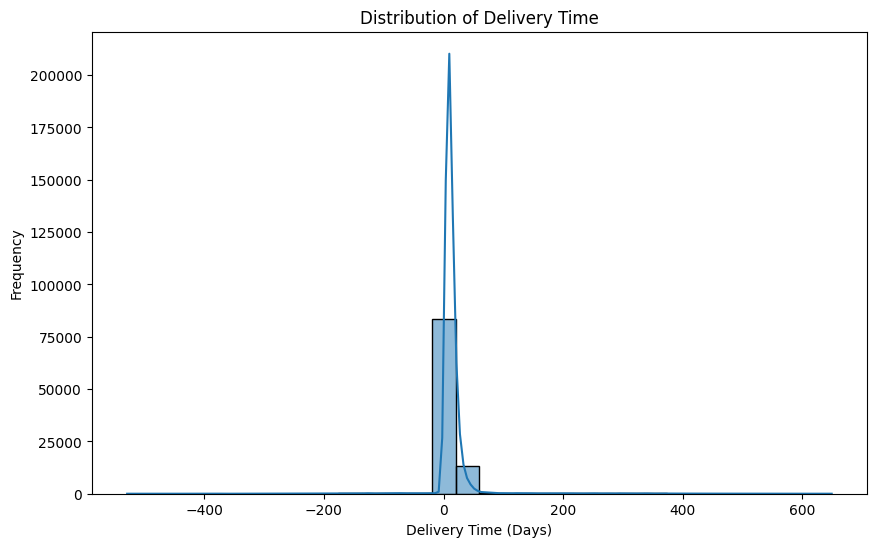

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(orders_customers_df['delivery_time'], bins=30, kde=True)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Frequency')
plt.show()

diagram diatas menunjukan distribusi waktu pengantaran (delivery time), dengan sumbu `x` mewakili delivery time (days), dan `y` mewakili frekuensinya

##### Explore gabungan `customers_df` dan `geolocation_df`

In [50]:
customers_geolocation_df = pd.merge(
    left=customers_df,
    right=geolocation_df,
    how="left",
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)
customers_geolocation_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.515413,-47.398194,franca,SP


In [51]:
customers_geolocation_df.groupby(by=['geolocation_city'])['customer_id'].nunique().sort_values(ascending=False)

,customer_id
geolocation_city,
sao paulo,15586
são paulo,15406
rio de janeiro,6923
belo horizonte,2789
brasilia,1951
...,...
ilicínea,1
santa rita de jacutinga,1
santa rita da floresta,1


In [52]:
customers_geolocation_df.groupby(by=['geolocation_state'])['customer_id'].nunique().sort_values(ascending=False)

,customer_id
geolocation_state,
SP,41731
RJ,12839
MG,11624
RS,5473
PR,5034
SC,3651
BA,3371
ES,2027
GO,2011


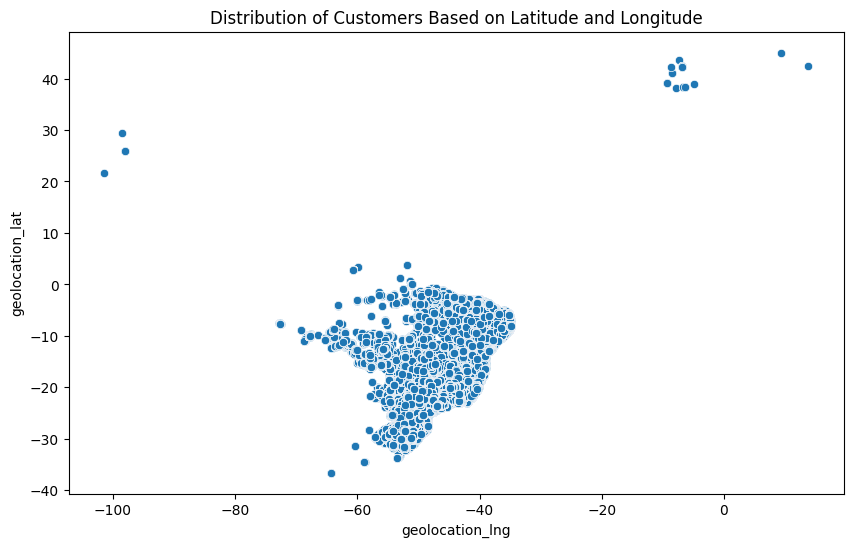

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='geolocation_lng', y='geolocation_lat', data=customers_geolocation_df)
plt.title('Distribution of Customers Based on Latitude and Longitude')
plt.show()

Berdasarkan data diatas, diagram tersebut menunjukan persebaran pelanggan berdasarkan latitude dan longtitude

#### Explore all data

In [54]:
all_data_df = pd.merge(
    left=orders_customers_df,
    right=customers_geolocation_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

In [55]:
all_data_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id_x,...,customer_state_x,customer_unique_id_y,customer_zip_code_prefix_y,customer_city_y,customer_state_y,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.578333,-46.587123,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.575033,-46.587451,sao paulo,SP
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.580054,-46.586673,sao paulo,SP
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.576281,-46.587276,sao paulo,SP


In [56]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10328006 entries, 0 to 10328005
Data columns (total 22 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   order_id                       object        
 1   customer_id                    object        
 2   order_status                   object        
 3   order_purchase_timestamp       datetime64[ns]
 4   order_approved_at              datetime64[ns]
 5   order_delivered_carrier_date   datetime64[ns]
 6   order_delivered_customer_date  datetime64[ns]
 7   order_estimated_delivery_date  datetime64[ns]
 8   delivery_time                  float64       
 9   customer_unique_id_x           object        
 10  customer_zip_code_prefix_x     int64         
 11  customer_city_x                object        
 12  customer_state_x               object        
 13  customer_unique_id_y           object        
 14  customer_zip_code_prefix_y     int64         
 15  customer_city

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana demografi pelanggan (lokasi, kota, negara bagian) memengaruhi frekuensi dan nilai pesanan?

In [57]:
# Agregasi data per negara bagian
state_data = all_data_df.groupby('customer_state_x')['order_id'].nunique().reset_index()
state_data.columns = ['state', 'order_frequency']

# Buat peta korelasi
fig = px.choropleth(state_data,
                    locations='state',
                    locationmode="USA-states",
                    color='order_frequency',
                    scope="usa",
                    title='Order Frequency by State')
fig.show()

Diagram diatas menunjukan frekuensi atau nilai pesanan per kota/negara. Warna daerah pada peta menujukan intensitas frekuensi/nilai pesanan.





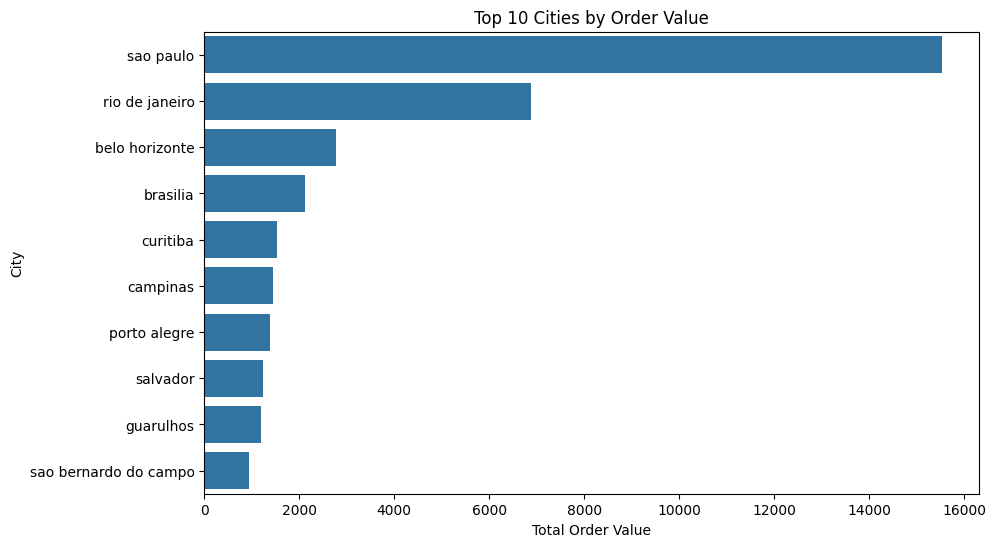

In [58]:
 # Agregasi data per kota
city_data = all_data_df.groupby('customer_city_x')['order_id'].nunique().sort_values(ascending=False).head(10)

# Buat horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=city_data.values, y=city_data.index, orient='h')
plt.title('Top 10 Cities by Order Value')
plt.xlabel('Total Order Value')
plt.ylabel('City')
plt.show()

Diagram diatas menunjukan frekuensi pesanan di 10 negara tertinggi berdasarkan order valuenya

### Pertanyaan 2: Bagaimana waktu pengiriman pesanan (delivery_time) memengaruhi kepuasan pelanggan dan potensi pembelian ulang?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



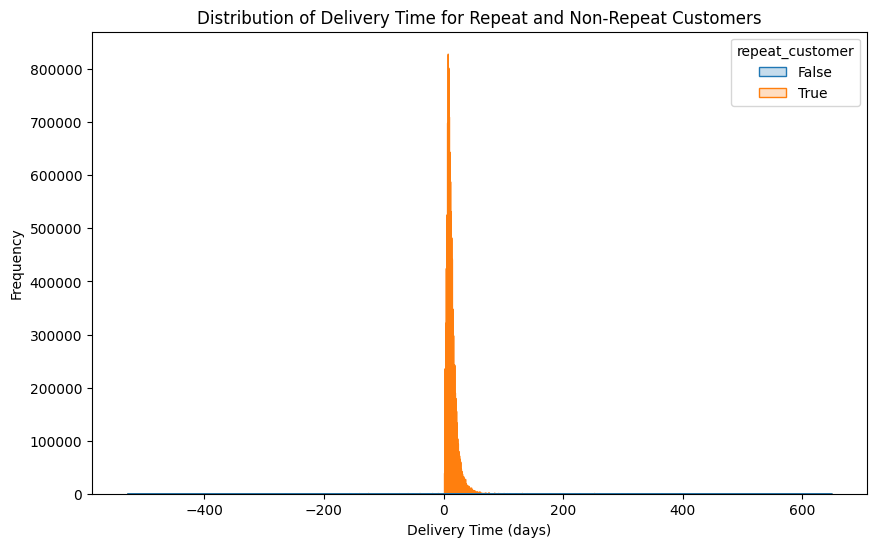

In [59]:
all_data_df['repeat_customer'] = all_data_df.duplicated(subset=['customer_id', 'order_id'], keep=False)

plt.figure(figsize=(10, 6))
sns.histplot(data=all_data_df, x='delivery_time', hue='repeat_customer', element='step', common_norm=False)
plt.title('Distribution of Delivery Time for Repeat and Non-Repeat Customers')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Frequency')
plt.show()

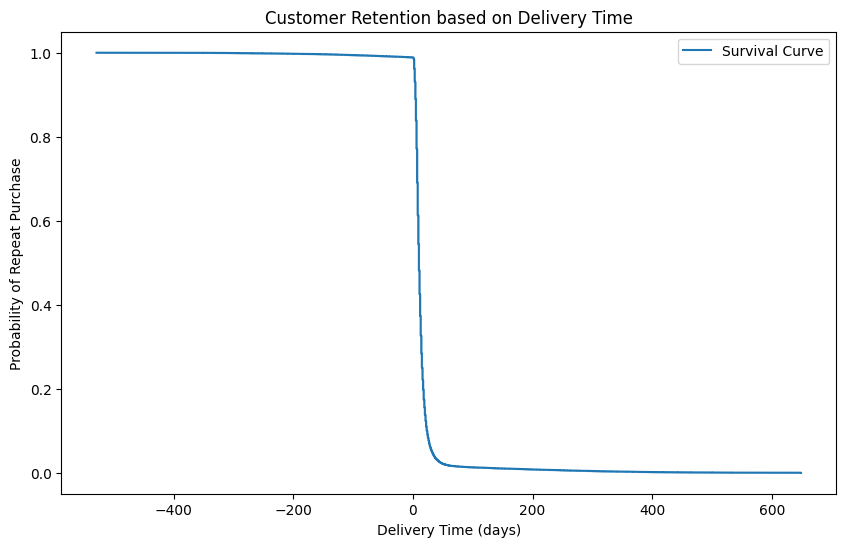

In [60]:
all_data_df = all_data_df.dropna(subset=['delivery_time', 'repeat_customer'])
all_data_df['delivery_time'] = all_data_df['delivery_time'].fillna(all_data_df['delivery_time'].median())
all_data_df['repeat_customer'] = all_data_df['repeat_customer'].fillna(False)


kmf = KaplanMeierFitter()
kmf.fit(all_data_df['delivery_time'], event_observed=all_data_df['repeat_customer'], label='Survival Curve')

plt.figure(figsize=(10, 6))
kmf.plot()
plt.title('Customer Retention based on Delivery Time')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Probability of Repeat Purchase')
plt.show()

Dari kedua diagram diatas dapat dilihat bagaimana waktu pengiriman mempengaruhi kepuasan pelanggan dan potensi pembelian ulang. Semakin lama delivery time yang dibutuhkan, maka semakin menurun pula potensi pembelian ulang oleh pelanggan.

## RFM Analysis

### Recency

In [61]:
# Tentukan tanggal acuan (misalnya, tanggal pembelian terakhir)
current_date = pd.to_datetime(all_data_df['order_purchase_timestamp'].max())

# Hitung recency (selisih waktu antara tanggal pembelian terakhir dan tanggal acuan)
all_data_df['recency'] = (current_date - pd.to_datetime(all_data_df['order_purchase_timestamp'])).dt.days

# Hitung R-score (quantile recency)
all_data_df['r_score'] = pd.qcut(all_data_df['recency'], 5, labels=[5, 4, 3, 2, 1], duplicates='drop')

### Frequency

In [62]:
# Hitung frequency (jumlah pesanan per pelanggan)
frequency = all_data_df.groupby('customer_id')['order_id'].nunique().reset_index()
frequency.columns = ['customer_id', 'frequency']
all_data_df = pd.merge(all_data_df, frequency, on='customer_id', how='left')

# Hitung F-score (quantile frequency)
# Penanganan error untuk F-score
num_unique_freq = all_data_df['frequency'].nunique()
num_quantiles = min(5, num_unique_freq)

if num_unique_freq > 1:
    all_data_df['f_score'] = pd.qcut(all_data_df['frequency'], q=num_quantiles, labels=False, duplicates='drop') + 1
else:
    all_data_df['f_score'] = 1

### Monetary

In [63]:
all_data_df['monetary'] = all_data_df['frequency']

# Hitung M-score menggunakan pd.cut dengan bin edges manual
num_unique_monetary = all_data_df['monetary'].nunique()

if num_unique_monetary > 4:
    # Tentukan bin edges secara manual (sesuaikan dengan data Anda)
    bins = [0, 1, 2, 3, float('inf')]
    labels = [1, 2, 3, 4]
    all_data_df['m_score'] = pd.cut(all_data_df['monetary'], bins=bins, labels=labels, include_lowest=True, duplicates='drop')
else:
    # Jika jumlah nilai unik kurang dari atau sama dengan 4, berikan label secara langsung
    all_data_df['m_score'] = all_data_df['monetary'].astype(int)

### RFM Score

In [64]:
# Gabungkan RFM score
all_data_df['rfm_score'] = all_data_df['r_score'].astype(str) + all_data_df['f_score'].astype(str) + all_data_df['m_score'].astype(str)

### Segmentasi

In [65]:
# Segmentasi pelanggan berdasarkan RFM score
all_data_df['segment'] = pd.cut(all_data_df['rfm_score'].astype(int), bins=[0, 333, 444, 555, float('inf')], labels=['Low', 'Mid', 'High', 'Top'])

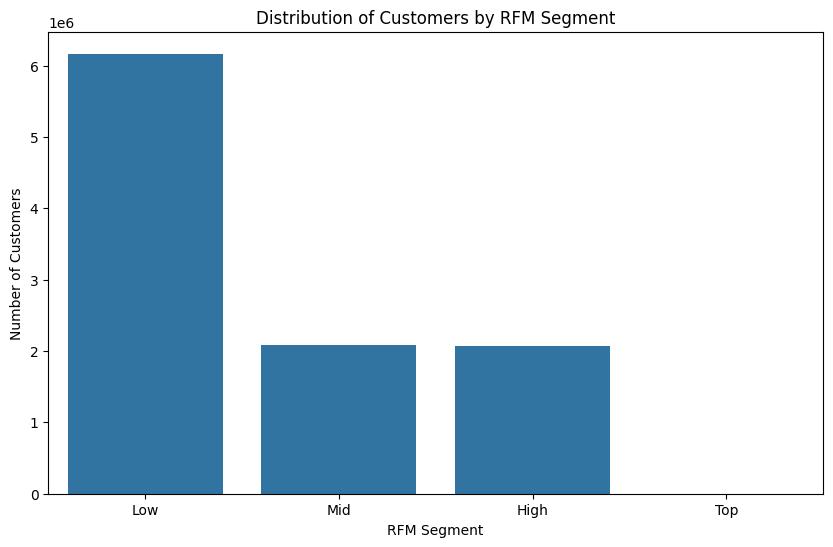

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(x='segment', data=all_data_df, order=['Low', 'Mid', 'High', 'Top'])
plt.title('Distribution of Customers by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.show()

Berdasarkan diagaram diatas dapat kita lihat bahwa diagram tersebut menampilkan jumlah pelanggan di setiap segmen RFM. Memberikan gambaran umum tentang distribusi pelanggan di setiap segmen.

## Conclusion



1.   Berdasarkan analisis data dan visualisasi yang dilakukan, dapat disimpulkan bahwa demografi pelanggan memiliki pengaruh terhadap frekuensi dan nilai pesanan. Terdapat beberapa pola yang teramati, antara lain:
*   Konsentrasi di wilayah tertentu: Terdapat konsentrasi pelanggan dan frekuensi/nilai pesanan yang lebih tinggi di kota-kota besar atau wilayah dengan kepadatan penduduk tinggi.
*   Perbedaan antar wilayah: Terdapat perbedaan frekuensi dan nilai pesanan antar wilayah, yang mungkin dipengaruhi oleh faktor-faktor seperti tingkat pendapatan, gaya hidup, dan aksesibilitas layanan.

2.   Analisis data dan visualisasi menunjukkan bahwa waktu pengiriman pesanan memiliki pengaruh terhadap kepuasan pelanggan dan potensi pembelian ulang. Beberapa insight yang diperoleh, antara lain:
*   Hubungan dengan kepuasan: Waktu pengiriman yang lebih lama cenderung menghasilkan kepuasan pelanggan yang lebih rendah, yang dapat terlihat dari repeat order customer.
*   Dampak pada retensi: Waktu pengiriman yang lebih lama dapat menyebabkan penurunan probabilitas pembelian ulang, yang menunjukkan bahwa kecepatan pengiriman merupakan faktor penting dalam mempertahankan pelanggan.



